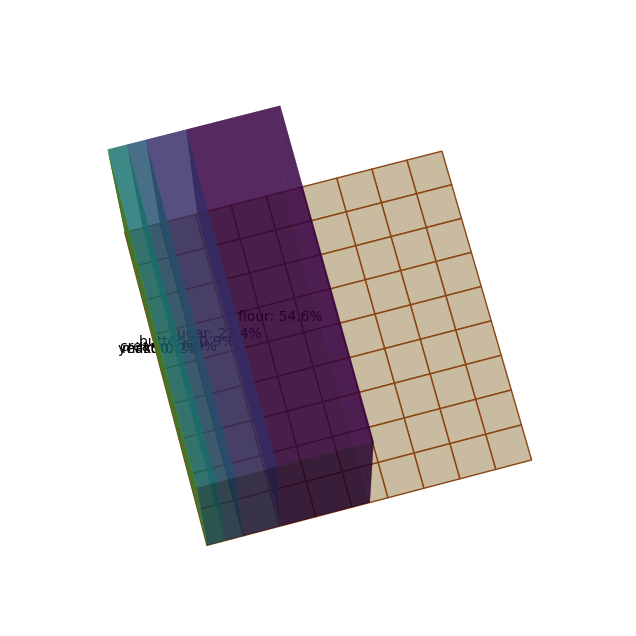

In [6]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
from PIL import Image
import numpy as np
import io

# Données
data = {'flour': 350, 'sugar': 150, 'butter': 70, 'cream': 70, 'yeast': 1, 'milk': 0.5}

# Calcul des pourcentages
total = sum(data.values())
percentages = {key: (value / total) * 100 for key, value in data.items()}

# Préparation des données pour la représentation
labels = list(percentages.keys())
sizes = list(percentages.values())

# Création de la gaufre 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dimensions de la gaufre
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

# Dessin de la gaufre
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='wheat', edgecolor='saddlebrown', alpha=0.8)

# Ajout des proportions sur la gaufre
cumulative_size = 0
for i, size in enumerate(sizes):
    x_start = cumulative_size
    x_end = cumulative_size + size / 100
    cumulative_size = x_end

    ax.bar3d(x_start, y.min(), z.min(), size / 100, y.max()-y.min(), 0.1, color=plt.cm.viridis(i/len(sizes)), alpha=0.6)
    ax.text(x_start + (size / 200), 0, 0.05, f'{labels[i]}: {size:.1f}%', color='black', ha='center')

# Ajustements de la vue
ax.view_init(75, 75)
ax.set_axis_off()

plt.show()

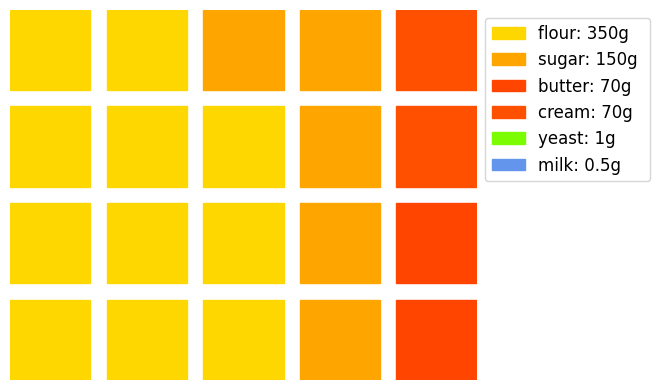

In [16]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Données
data = {'flour': 350, 'sugar': 150, 'butter': 70, 'cream': 70, 'yeast': 1, 'milk': 0.5}

# Calcul des pourcentages
total = sum(data.values())
percentages = {key: (value / total) * 100 for key, value in data.items()}

# Préparation des données pour le Waffle Plot
# On veut un total de 12 cases (3x4), donc on ajuste les valeurs proportionnellement
n_squares = 100
scaled_data = {key: round(value / total * n_squares) for key, value in data.items()}

# S'assurer que le nombre total de cases est bien égal à 12
# Si la somme ne fait pas 12, ajuster légèrement la différence sur le plus grand élément
difference = n_squares - sum(scaled_data.values())
if difference != 0:
    max_key = max(scaled_data, key=scaled_data.get)
    scaled_data[max_key] += difference

# Préparer les étiquettes pour la légende avec les valeurs
legend_labels = [f'{key}: {value}g ' for key, value in data.items()]

# Création du Waffle Plot 10x10
fig = plt.figure(
    FigureClass=Waffle,
    rows=4, 
    columns=5, 
    values=scaled_data, 
    colors=["#FFD700", "#FFA500", "#FF4500", "#FF5000", "#7CFC00", "#6495ED"],
    legend={
        'labels': legend_labels, 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1),
        'fontsize': 12
    })

plt.show()


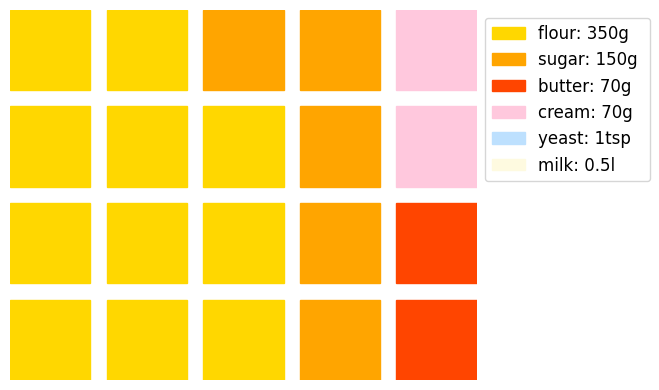

In [26]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Données avec unités spécifiques
data = {
    'flour': {'value': 350, 'unit': 'g'},
    'sugar': {'value': 150, 'unit': 'g'},
    'butter': {'value': 70, 'unit': 'g'},
    'cream': {'value': 70, 'unit': 'g'},
    'yeast': {'value': 1, 'unit': 'tsp'},  # teaspoon (cuillère à café)
    'milk': {'value': 0.5, 'unit': 'l'}  # cup (tasse)
}

# Calcul des pourcentages
total = sum(item['value'] for item in data.values())
percentages = {key: (item['value'] / total) * 100 for key, item in data.items()}

# Préparation des données pour le Waffle Plot
# On veut un total de 100 cases (10x10), donc on ajuste les valeurs proportionnellement
n_squares = 100
scaled_data = {key: round(item['value'] / total * n_squares) for key, item in data.items()}

# S'assurer que le nombre total de cases est bien égal à 100
# Si la somme ne fait pas 100, ajuster légèrement la différence sur le plus grand élément
difference = n_squares - sum(scaled_data.values())
if difference != 0:
    max_key = max(scaled_data, key=scaled_data.get)
    scaled_data[max_key] += difference

# Préparer les étiquettes pour la légende avec les valeurs et les unités
legend_labels = [f'{key}: {item["value"]}{item["unit"]} ' for key, item in data.items()]

# Création du Waffle Plot 10x10
fig = plt.figure(
    FigureClass=Waffle,
    rows=4, 
    columns=5, 
    values=scaled_data, 
    colors=["#FFD700", "#FFA500", "#FF4500", "#FFC8DD", "#BDE0FE", "#FEFAE0"],
    legend={
        'labels': legend_labels, 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1),
        'fontsize': 12
    })

plt.show()


In [27]:
!pip install cutecharts

In [31]:
#import library and dataimport cutecharts.charts as ctc
import pandas as pd
import cutecharts.charts as ctc

df = pd.DataFrame({
    'x': ['Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.'],
    'y': [14, 15, 17, 20, 22.3, 23.7, 24.8],
    'z': [16, 16.4, 23.6, 24.5, 19.9, 13.6, 13.4]
})

In [32]:
chart = ctc.Bar('Toronto Temperature',width='500px',height='400px')
chart.set_options(
 labels=list(df['x']),
 x_label='Days',
 y_label='Temperature (Celsius)' ,
 colors=['#1EAFAE' for i in range(len(df))]
 )
chart.add_series('This week',list(df['y']))
chart.render_notebook()

In [40]:

# Data for the crepe ingredients
data = {
    'Ingredient': ['Flour', 'Milk', 'Eggs', 'Butter', 'Sugar', 'Salt'],
    'Quantity': [250, 500, 3, 50, 30, 1]  # in grams or milliliters
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a pie chart
chart = ctc.Pie('', width='500px', height='400px')

# Set chart options with custom colors
chart.set_options(
    labels=list(df['Ingredient']),
    inner_radius=0,
    colors=['#f7ede2','#f6bd60', '#f5cac3', '#84a59d', '#f28482', '#709775']  # Custom colors
)

# Add data to the chart
chart.add_series(list(df['Quantity']))

# Render the chart in the notebook
chart.render_notebook()
